# Loading the data

In [36]:
%matplotlib inline
import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE

#using The Preprocess SqLite table to read the data
con = sqlite3.connect('./amazon-fine-food-reviews/finalsqlite')

#Filtering only postive review
positive_review = pd.read_sql_query(""" 
SELECT * FROM Reviews WHERE Score == 'positive'
""",con)

#Extracting 2000 positive reviews randomly
positive_review.head()
positive_smaller_review_set = positive_review.sample(200)
print(positive_smaller_review_set.shape)

#Filtering only negative review
negative_review = pd.read_sql_query(""" 
SELECT * FROM Reviews WHERE Score == 'negative'
""",con)

#Extracting 2000 negative reviews randomly
negative_review.head()
negative_smaller_review_set = negative_review.sample(200)
print(negative_smaller_review_set.shape)

#Concanating the positive and negative review into one datframe
frames = [positive_smaller_review_set, negative_smaller_review_set]
final = pd.concat(frames)
print(final.shape)
final.head()

(200, 12)
(200, 12)
(400, 12)


,index,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText
143297,141609,153663,B001E5E10A,A2TH8PVFE0MPW6,"Russian Bear ""Russian Bear""",0,1,positive,1184889600,"if you ever go outdoors, this tea is for you",Nothing beats thirst better than clean cold sp...,b'noth beat thirst better clean cold spring wa...
2005,116534,126373,B0000CAV3C,A2K4OAG41UD9GW,S. Connelly,1,1,positive,1264896000,Excellent,This coffee is wonderful. Turkish Coffee has a...,b'coffe wonder turkish coffe way get flavor po...
50133,146167,158563,B000F1PR8E,A3Q30ZLF1UDGQU,Oliver,1,1,positive,1268956800,DELICIOUS WITH EXCESSIVE AMTS OF PRODUCT,If I didn't have to add so much of this to my ...,b'didnt add much mug would given star much two...
63524,180250,195503,B000G8Q84S,A3GCZGLGU19QFN,"Amanda K. Dewis ""Amanda D.""",0,0,positive,1282176000,Great for preemies!,This is the formula the NICU told me to use fo...,b'formula nicu told use twin final sent home h...
180756,62642,68063,B001PNY9IK,ARB5S2WDFXF50,Alice,1,1,positive,1321056000,Delicious non-chemical cream substitute,I had originally purchased this product at a l...,b'origin purchas product local supermarket lik...


# Bag Of Words(BOW)

In [37]:
#BOW of unpreprocess text
count_vect = CountVectorizer()
final_counts = count_vect.fit_transform(final['Text'].values)

#BOW of preprocess text
final_counts_preprocess_text = count_vect.fit_transform(final['CleanedText'].values)


#Shape of Both vectors
print("Shape of vector of not Preprocess review(text) after BOW(unigram)",final_counts.get_shape())
print("Shape of vector of Preprocess review(text) after BOW(unigram)",final_counts_preprocess_text.get_shape())

Shape of vector of not Preprocess review(text) after BOW(unigram) (400, 4550)
Shape of vector of Preprocess review(text) after BOW(unigram) (400, 3208)


# Standarization Of Vector

In [38]:
from sklearn.preprocessing import StandardScaler

#Standarization of unpreprocessed data
standardized_data = StandardScaler().fit_transform(final_counts.toarray())
print(standardized_data.shape)

#Standarization of preprocessed data
standardized_data_preprocess_data = StandardScaler().fit_transform(final_counts_preprocess_text.toarray())
print(standardized_data_preprocess_data.shape)

C:\Users\DANAV\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


(400, 4550)
(400, 3208)


# TSNE on BOW of Unpreprocessed review text

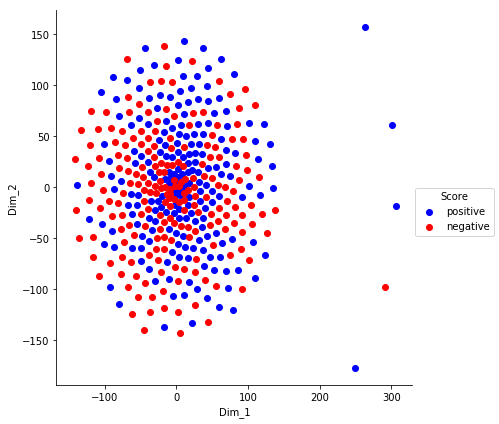

In [39]:
import seaborn as sn
model = TSNE(n_components=2, random_state=0)
tsne_data = model.fit_transform(standardized_data)

tsne_data = np.vstack((tsne_data.T , final['Score'].T)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "Score"))

# # Ploting the result of tsne
d = {'color': ['b', 'r']}
sn.FacetGrid(tsne_df, hue_kws=d, hue='Score', size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

# TSNE on BOW of Preprocessed review text

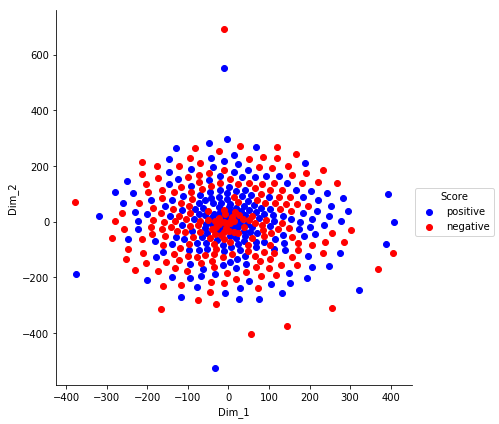

In [40]:

tsne_data = model.fit_transform(standardized_data_preprocess_data)
tsne_data = np.vstack((tsne_data.T , final['Score'].T)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "Score"))

# # Ploting the result of tsne
d = {'color': ['b', 'r']}
sn.FacetGrid(tsne_df, hue_kws=d, hue='Score', size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

# Bi-Grams and n-Grams.

In [41]:
#BOW of unpreprocess text
count_vect = CountVectorizer(ngram_range = (1,2))
final_counts = count_vect.fit_transform(final['Text'].values)

#BOW of preprocess text
final_counts_preprocess_text = count_vect.fit_transform(final['CleanedText'].values)


#Shape of Both vectors
print("Shape of vector of not Preprocess review(text) after BOW(unigram and Bigram)",final_counts.get_shape())
print("Shape of vector of Preprocess review(text) after BOW(unigram and Bigram)",final_counts_preprocess_text.get_shape())

Shape of vector of not Preprocess review(text) after BOW(unigram and Bigram) (400, 26847)
Shape of vector of Preprocess review(text) after BOW(unigram and Bigram) (400, 18396)


# Standarization Of Vector

In [42]:

#Standarization of unpreprocessed data
standardized_data = StandardScaler().fit_transform(final_counts.toarray())
print(standardized_data.shape)

#Standarization of preprocessed data
standardized_data_preprocess_data = StandardScaler().fit_transform(final_counts_preprocess_text.toarray())
print(standardized_data_preprocess_data.shape)

C:\Users\DANAV\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


(400, 26847)
(400, 18396)


# Tsne on BOW(Bigram) Of Unpreprocessed data

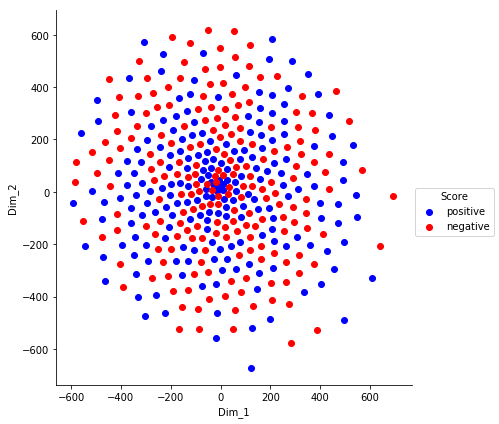

In [43]:

model = TSNE(n_components=2, random_state=0, perplexity=10)
tsne_data = model.fit_transform(standardized_data)

tsne_data = np.vstack((tsne_data.T , final['Score'].T)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "Score"))

# # Ploting the result of tsne
d = {'color': ['b', 'r']}
sn.FacetGrid(tsne_df, hue_kws=d, hue='Score', size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

# Tsne on BOW(Bigram) Of preprocessed data

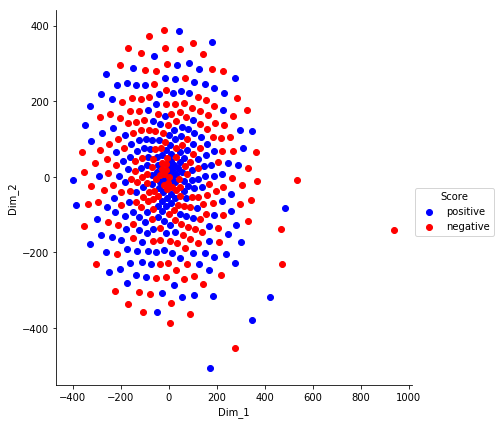

In [44]:

tsne_data = model.fit_transform(standardized_data_preprocess_data)
tsne_data = np.vstack((tsne_data.T , final['Score'].T)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "Score"))

# # Ploting the result of tsne
d = {'color': ['b', 'r']}
sn.FacetGrid(tsne_df, hue_kws=d, hue='Score', size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

# TF-IDF

In [45]:
#tf-idf of unpreprocess text
tf_idf_vect  = TfidfVectorizer(ngram_range=(1,2))
final_tf_idf = tf_idf_vect.fit_transform(final['Text'].values)


#tf-idf of preprocess text
final_tf_idf_preprocess_text =  tf_idf_vect.fit_transform(final['CleanedText'].values)


#Shape of Both vectors
print("Shape of vector of not Preprocess review(text) after Tf-Idf",final_tf_idf.get_shape())
print("Shape of vector of Preprocess review(text) after Tf-Idf",final_tf_idf_preprocess_text.get_shape())


Shape of vector of not Preprocess review(text) after Tf-Idf (400, 26847)
Shape of vector of Preprocess review(text) after Tf-Idf (400, 18396)


# Standarization Of Vector

In [50]:
#Standarization of unpreprocessed data
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(final_tf_idf.toarray())
print(standardized_data.shape)

#Standarization of preprocessed data
standardized_data_preprocess_data = StandardScaler().fit_transform(final_tf_idf_preprocess_text.toarray())
print(standardized_data_preprocess_data.shape)

(400, 26847)
(400, 18396)


# Tsne on Tf-Idf(Bigram) Of Unpreprocessed data

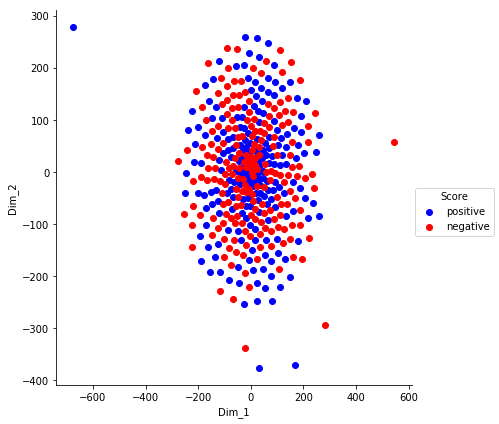

In [51]:

model = TSNE(n_components=2, random_state=0 )
tsne_data = model.fit_transform(standardized_data)

tsne_data = np.vstack((tsne_data.T , final['Score'].T)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "Score"))

# # Ploting the result of tsne
d = {'color': ['b', 'r']}
sn.FacetGrid(tsne_df, hue_kws=d, hue='Score', size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

# Tsne on Tf-Idf(Bigram) Of preprocessed data

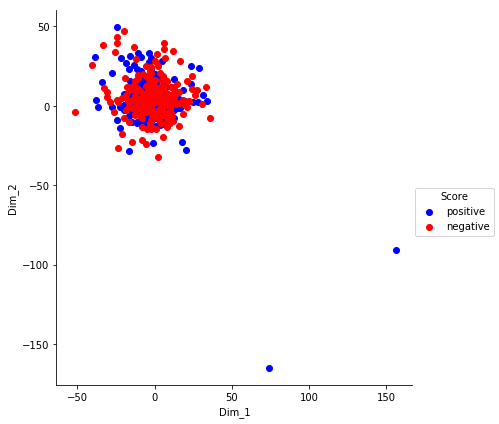

In [52]:
model = TSNE(n_components=2, random_state=0, perplexity= 10 )
tsne_data = model.fit_transform(standardized_data_preprocess_data)
tsne_data = np.vstack((tsne_data.T , final['Score'].T)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "Score"))

# # Ploting the result of tsne
d = {'color': ['b', 'r']}
sn.FacetGrid(tsne_df, hue_kws=d, hue='Score', size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

# WORD2Vec

In [53]:
#Definition oF CleanHtml and CleanPunc for Preprocessing the reviw text
import re
def cleanhtml(sentence): #function to clean the word of any html-tags
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext
def cleanpunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned

In [54]:
# Train your own Word2Vec model using your own text corpus
import gensim
i=0
list_of_sent=[]
for sent in final['Text'].values:
    filtered_sentence=[]
    sent=cleanhtml(sent)
    for w in sent.split(): 
        for cleaned_words in cleanpunc(w).split():
            if(cleaned_words.isalpha()):    
                filtered_sentence.append(cleaned_words.lower())
            else:
                continue 
    list_of_sent.append(filtered_sentence)
    

In [55]:
w2v_model=gensim.models.Word2Vec(list_of_sent,min_count= 3,size=50, workers=4)

# AVG Word2Vec Model

(400, 50)


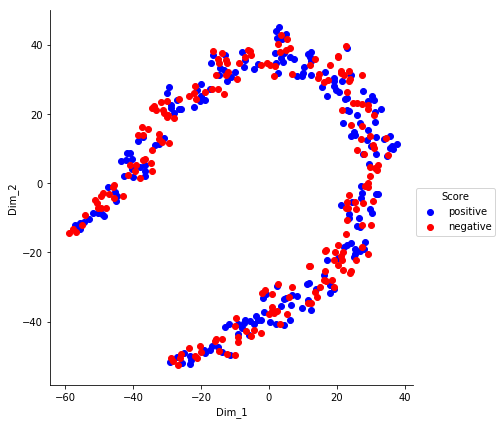

C:\Users\DANAV\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('for', 0.9999175071716309),
 ('from', 0.9999169111251831),
 ('on', 0.9999165534973145),
 ('at', 0.9999159574508667),
 ('not', 0.9999129176139832),
 ('and', 0.9999103546142578),
 ('in', 0.9999034404754639),
 ('that', 0.9999011754989624),
 ('with', 0.9999010562896729),
 ('the', 0.9999010562896729)]

In [56]:
#Using the previous preprocessed text from list_of_sent list

Avg_sent_vectors = []
for sent in list_of_sent:
    sent_vect = np.zeros(50)
    count = 0
    for word in sent:
        try :
            sent_vect += w2v_model.wv[word]
            count = count + 1
        except:
            pass
    
    sent_vect = sent_vect / count
    Avg_sent_vectors.append(sent_vect)
     
#Standarization Of Avg Word2Vec vector
standardized_data = StandardScaler().fit_transform(Avg_sent_vectors)
print(standardized_data.shape)

#Tsne on Avg Word2Vec Vector

model = TSNE(n_components=2, random_state=0 , perplexity =10)
tsne_data = model.fit_transform(standardized_data)

tsne_data = np.vstack((tsne_data.T , final['Score'].T)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "Score"))

# # Ploting the result of tsne
d = {'color': ['b', 'r']}
sn.FacetGrid(tsne_df, hue_kws=d, hue='Score', size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()
w2v_model.wv.most_similar('like')

# TF-IDF weighted Word2Vec

C:\Users\DANAV\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide


(400, 50)


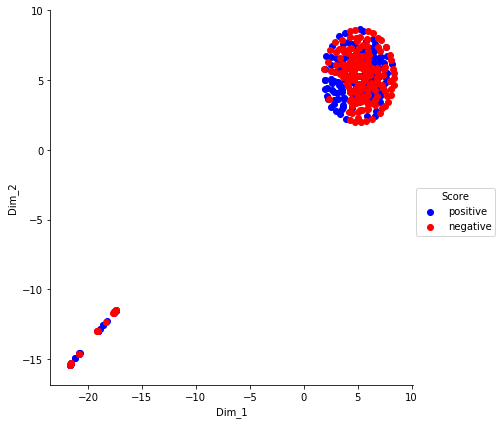

C:\Users\DANAV\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('her', 0.999136209487915),
 ('before', 0.9990924596786499),
 ('we', 0.9990754127502441),
 ('sweet', 0.9990655779838562),
 ('people', 0.9990536570549011),
 ('but', 0.9990490674972534),
 ('test', 0.9990400075912476),
 ('white', 0.9990250468254089),
 ('any', 0.9990212917327881),
 ('just', 0.9990180730819702)]

In [57]:
tf_idf_feat = tf_idf_vect.get_feature_names()
tfidf_sent_vect=[]

row= 0;
for sent in list_of_sent:
    sent_vec = np.zeros(50)
    weight_sum = 0
    for word in sent:
        try:
            if((word in  w2v_model.wv.vocab) and (word in tf_idf_feat)): 
                w_vec = w2v_model.wv[word]
                tf_idf_vec = final_tf_idf[row,tf_idf_feat.index(word)]
                sent_vec = sent_vec + (w_vec*tf_idf_vec)
                weight_sum = weight_sum + tf_idf_vec
        except:
            pass
    sent_vec = sent_vec/weight_sum
    tfidf_sent_vect.append(sent_vec)
    row= row+1 

# Removing NAN values    
tfidf_sent_vect_values = np.nan_to_num(tfidf_sent_vect)

# Standarization Of Tf-Idf Word2Vec Vector
standardized_data = StandardScaler().fit_transform(tfidf_sent_vect_values)
print(standardized_data.shape)

#Tsne on Tf-Idf Word2Vec Vector

model = TSNE(n_components=2, random_state=0 , perplexity =10)
tsne_data = model.fit_transform(standardized_data)

tsne_data = np.vstack((tsne_data.T , final['Score'].T)).T

tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "Score"))

# Ploting the result of tsne
d = {'color': ['b', 'r']}
sn.FacetGrid(tsne_df, hue_kws=d, hue='Score', size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()
w2v_model.wv.most_similar('happy')